### 0. (Optional) Extract video file

In [5]:
import cv2
import os

capture = cv2.VideoCapture("test_video.mp4")
assert capture.isOpened(), "Cannot open the video file."

num_frames = int(capture.get(cv2.CAP_PROP_FRAME_COUNT))

# Prepare folders
img_filename_fmt = 'dataset/images/frame_{:09d}.jpg'
dirname = os.path.dirname(img_filename_fmt)
os.makedirs(dirname, exist_ok=True)
k = 0
for ii in range(num_frames):
    if ii%3 == 0:
        _, frame = capture.read()
        cv2.imwrite(img_filename_fmt.format(k), frame)
        k += 1 
    

capture.release()

In [11]:
import cv2
cur_index = 0
img_filename_fmt = 'images3/frame_{:09d}.jpg'

for _ in range(730):
    frame = cv2.imread(img_filename_fmt.format(cur_index))
    frame = cv2.resize(frame,(640,360))
    cv2.imwrite("./images3" + "/frame_{:09d}.jpg".format(cur_index), frame)
    cur_index += 1

### 1. Label images

- Assume all images have same size

In [9]:
import cv2

count = 0
for _ in range(2318):
    frame = cv2.imread("./dataset/image/frame%d.jpg" % count)
    cv2.imwrite("./image2" + "/frame%d.jpg" % (count+2210), frame)
    count += 1

In [47]:
import cv2
import os

from collections import OrderedDict
from ipywidgets import IntSlider, Label, Button, HBox
from ipycanvas import MultiCanvas, hold_canvas

thickness = 3
y_ratio = 0.7     # percentile of y-position from the top
    
# Input images
img_filename_fmt = 'dataset2/images/frame_{:09d}.jpg'
ann_filename = 'dataset2/annotation.txt'
ann_dict = OrderedDict()

num_frames = len(os.listdir(os.path.dirname(img_filename_fmt)))

cur_index = 0
height, width = cv2.imread(img_filename_fmt.format(cur_index)).shape[:2]
y_value = int(height * y_ratio)

def set_image():        
    image = cv2.imread(img_filename_fmt.format(cur_index))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image[y_value-thickness//2:y_value+thickness//2] = (255, 0, 0)

    canvas[0].clear()
    canvas[0].put_image_data(image, 0, 0)
    canvas[0].flush()

    pos = ann_dict.get(img_filename_fmt.format(cur_index))
    if pos is not None:
        handle_mouse_down(pos[0], pos[1])    

    cur_fname.value = 'Current image: {:s} | '.format(img_filename_fmt.format(cur_index))

def handle_mouse_move(xpos, ypos):
    with hold_canvas():
        canvas[1].clear()  # Clear the old animation step
        canvas[1].fill_style = "yellow"
        canvas[1].fill_circle(xpos, y_value, 5)  # Draw the new frame    

def handle_mouse_down(xpos, ypos):    
    with hold_canvas():
        canvas[2].clear()
        canvas[2].fill_style = "green"
        canvas[2].fill_circle(xpos, y_value, 5)  # Draw the new frame    
    xpos = int(xpos)  # Make xpos integer
    cur_pos.value = "({:d}, {:d}) ".format(xpos, y_value)    
    ann_dict[img_filename_fmt.format(cur_index)] = (xpos, y_value)
    
def handle_slider_change(change):
    global y_value
    y_value = change.new
    set_image()
    canvas[1].clear()
    canvas[2].clear()

def handle_save_button(b):
    with open(ann_filename, 'w') as f:
        for k, v in ann_dict.items():            
            f.write("{:s}\t{:d}\t{:d}\n".format(k, v[0], v[1]))    

def handle_prev_button(b):
    global cur_index
    cur_index = max(0, cur_index - 1)
    canvas.clear()
    set_image()

def handle_next_button(b):
    global cur_index
    cur_index = min(num_frames - 1, cur_index + 1)
    canvas.clear()
    set_image()

canvas = MultiCanvas(3, width=width, height=height)
cur_fname = Label(value='', disabled=False)
cur_pos = Label(value='', disabled=True)
yslider = IntSlider(description="Y-bar: ", stype={'description_width': 'initial'}, value=y_value, min=1, max=height-2, step=1)
prev_btn = Button(description='Prev', icon='arrow-left')
next_btn = Button(description='Next', icon='arrow-right')
save_btn = Button(description='Save labels', icon='check')

set_image()
canvas.on_mouse_move(handle_mouse_move)
canvas.on_mouse_down(handle_mouse_down)
yslider.observe(handle_slider_change, names='value')

prev_btn.on_click(handle_prev_button)
next_btn.on_click(handle_next_button)
save_btn.on_click(handle_save_button)

display(canvas, HBox([cur_fname, cur_pos, yslider]), HBox([prev_btn, next_btn, save_btn]))


MultiCanvas(height=540, width=960)

In [4]:
import cv2
import os

from collections import OrderedDict
from ipywidgets import IntSlider, Label, Button, HBox
from ipycanvas import MultiCanvas, hold_canvas

thickness = 3
y_ratio = 0.7     # percentile of y-position from the top
    
# Input images
img_filename_fmt = 'dataset/images2/frame%d.jpg'
ann_filename = 'dataset/annotation.txt'
ann_dict = OrderedDict()

num_frames = len(os.listdir(os.path.dirname(img_filename_fmt)))

cur_index = 731
#height, width = cv2.imread(img_filename_fmt.format(cur_index)).shape[:2]
height, width = cv2.imread(img_filename_fmt % cur_index).shape[:2]
y_value = int(height * y_ratio)

def set_image():        
    image = cv2.imread(img_filename_fmt % cur_index)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)    
    image[y_value-thickness//2:y_value+thickness//2] = (255, 0, 0)

    canvas[0].clear()
    canvas[0].put_image_data(image, 0, 0)
    canvas[0].flush()

    pos = ann_dict.get(img_filename_fmt.format(cur_index))
    if pos is not None:
        handle_mouse_down(pos[0], pos[1])    

    cur_fname.value = 'Current image: {:s} | '.format(img_filename_fmt % cur_index)

def handle_mouse_move(xpos, ypos):
    with hold_canvas():
        canvas[1].clear()  # Clear the old animation step
        canvas[1].fill_style = "yellow"
        canvas[1].fill_circle(xpos, y_value, 5)  # Draw the new frame    

def handle_mouse_down(xpos, ypos):    
    with hold_canvas():
        canvas[2].clear()
        canvas[2].fill_style = "green"
        canvas[2].fill_circle(xpos, y_value, 5)  # Draw the new frame    

    cur_pos.value = "({:f}, {:f}) ".format(xpos, y_value)    
    ann_dict[img_filename_fmt % cur_index] = (xpos, y_value)
    
def handle_slider_change(change):
    global y_value
    y_value = change.new
    set_image()
    canvas[1].clear()
    canvas[2].clear()

def handle_save_button(b):
    with open(ann_filename, 'w') as f:
        for k, v in ann_dict.items():            
            f.write("{:s}\t{:f}\t{:f}\n".format(k, v[0], v[1]))    

def handle_prev_button(b):
    global cur_index
    cur_index = max(0, cur_index - 1)
    canvas.clear()
    set_image()

def handle_next_button(b):
    global cur_index
    #cur_index = min(num_frames - 1, cur_index + 1)
    cur_index += 1
    canvas.clear()
    set_image()

canvas = MultiCanvas(3, width=width, height=height)
cur_fname = Label(value='', disabled=False)
cur_pos = Label(value='', disabled=True)
yslider = IntSlider(description="Y-bar: ", stype={'description_width': 'initial'}, value=y_value, min=1, max=height-2, step=1)
prev_btn = Button(description='Prev', icon='arrow-left')
next_btn = Button(description='Next', icon='arrow-right')
save_btn = Button(description='Save labels', icon='check')

set_image()
canvas.on_mouse_move(handle_mouse_move)
canvas.on_mouse_down(handle_mouse_down)
yslider.observe(handle_slider_change, names='value')

prev_btn.on_click(handle_prev_button)
next_btn.on_click(handle_next_button)
save_btn.on_click(handle_save_button)

display(canvas, HBox([cur_fname, cur_pos, yslider]), HBox([prev_btn, next_btn, save_btn]))

MultiCanvas(height=360, width=640)

[ WARN:0@726.738] global loadsave.cpp:248 findDecoder imread_('dataset/images2/frame1466.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[ WARN:0@726.923] global loadsave.cpp:248 findDecoder imread_('dataset/images2/frame1467.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


[ WARN:0@727.086] global loadsave.cpp:248 findDecoder imread_('dataset/images2/frame1468.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


### 2. Train a model

In [65]:
import torch
import torchvision
from torch import nn

def get_model():
    model = torchvision.models.alexnet(num_classes=2, dropout=0.3)
    #model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
    #num_classes = 2
    #num_ftrs = model.fc.in_features
    #model.fc = nn.Linear(num_ftrs, num_classes)
    return model

device = torch.device('cuda')
model = get_model()
model = model.to(device)

In [66]:
import torchsummary
torchsummary.summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

In [67]:
import numpy as np
import os
import PIL.Image

import torch
import torch.utils.data
import torchvision.transforms as transforms

TRAIN_TRANSFORMS = transforms.Compose([
    #transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((224, 224)),    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

TEST_TRANSFORMS = transforms.Compose([
    transforms.Resize((224, 224)),    
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


class CenterDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, random_hflip=True, transform=TRAIN_TRANSFORMS):
        super(CenterDataset, self).__init__()
        self.root_dir = root_dir
        self.random_hflip = random_hflip
        self.transform = transform
                
        with open(os.path.join(root_dir, 'annotation.txt'), 'r') as f:
            self.data = [line.split() for line in f.readlines()]
            # self.data = [(image_filename: (xpos, ypos) for image_filename, xpos, ypos in f.readlines()}
                        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):        
        filename, xpos, ypos = self.data[idx]
        if filename is None:
            print(idx)
        xpos = float(xpos)
        ypos = float(ypos)
        #print(type(xpos))
        image = PIL.Image.open(filename)
        width = image.width
        height = image.height
        #print(width,height)
        #960 540
        # image = cv2.imread(filename, cv2.IMREAD_COLOR)
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # height, width = image.shape[:2]

        # image = PIL.Image.fromarray(image)
        # width = image.width
        # height = image.height
        if self.transform is not None:
            image = self.transform(image)
        
        x = 2.0 * (xpos / width - 0.5) # map to [-1, +1]
        y = 2.0 * (ypos / height - 0.5) # map to [-1, +1]
        
        if self.random_hflip and float(np.random.random(1)) > 0.5:
            image = torch.flip(image, [-1])
            x = -x
            
        return image, torch.Tensor([x, y])

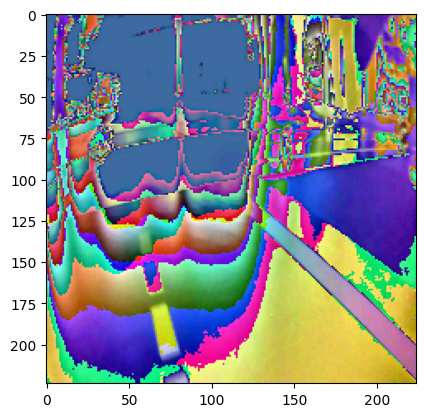

In [68]:
import matplotlib.pyplot as plt
import torchvision.transforms as T

dataset_test = CenterDataset('./dataset', random_hflip=True)
img, x = dataset_test[1000]
transform = T.ToPILImage()
img = transform(img)
#print(img)
img_np = np.array(img) ## 행렬로 변환된 이미지
plt.imshow(img) ## 행렬 이미지를 다시 이미지로 변경해 디스플레이
plt.show() ## 이미지 인터프린터에 출력


In [69]:
import torch

batch_size = 16

dataset = CenterDataset('./dataset', random_hflip=True)
train_loader = torch.utils.data.DataLoader(
    dataset,
    num_workers=0,
    batch_size=batch_size,
    shuffle=True,
)

In [70]:
dataset_size = len(dataset)
train_size = int(dataset_size*0.8)
validation_size = int(dataset_size*0.1)
test_size = dataset_size - train_size - validation_size
train_dataset, validation_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, validation_size, test_size])

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    num_workers=0,
    batch_size=batch_size,
    shuffle=True,
)

valid_loader = torch.utils.data.DataLoader(
    validation_dataset,
    num_workers=0,
    batch_size=batch_size,
    shuffle=True,
)

In [56]:
import ipywidgets
import torch.nn.functional as f

epoch = 200
learning_rate = 2e-3
# learning_rate = 2e-4

epoch_slider = ipywidgets.IntSlider(description='Epochs', value=epoch, min=1, max=200, step=1)
lr_slider = ipywidgets.FloatSlider(description='lr', value=learning_rate, min=1e-4, max=1e-2, step=1e-4, readout_format='.4f')
train_button = ipywidgets.Button(description='Train', icon='tasks')
loss_text = ipywidgets.Textarea(description='Progress', value='', rows=15, layout=ipywidgets.Layout(width="50%", height="auto"))
layout = ipywidgets.VBox([ipywidgets.HBox([epoch_slider, lr_slider, train_button]), loss_text])


def train_model(b):
    global epoch_slider
    for epoch in range(epoch_slider.value):
        loss_text.value += "<<<<< Epoch {:d} >>>>>\n".format(epoch)
        train_step()                


def train_step():
    global model, lr_slider, loss_text, train_laoder, device

    try:
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        #optimizer = torch.optim.SGD(model.parameters(), lr=lr_slider.value, momentum=0.9)

        train_button.disabled = True                
        model = model.train()        

        num_iters = len(train_loader)
        for ii, (images, labels) in enumerate(train_loader):
            # send data to device
            images = images.to(device)
            labels = labels.to(device)

            # zero gradients of parameters
            optimizer.zero_grad()
            
            # execute model to get outputs
            outputs = model(images)
            # compute MSE loss over x coordinates            
            loss = f.mse_loss(outputs, labels, reduction='sum')
            
            # run backpropogation to accumulate gradients
            loss.backward()

            # step optimizer to adjust parameters
            optimizer.step()

            if ii % 10 == 0:
                xlbl, ylbl = labels[0].cpu()
                xlbl = ( xlbl.item() / 2 + 0.5 ) * 640
                ylbl = ( ylbl.item() / 2 + 0.5 ) * 360

                xpre, ypre = outputs[0].cpu()
                xpre = ( xpre.item() / 2 + 0.5 ) * 640
                ypre = ( ypre.item() / 2 + 0.5 ) * 360

                msg = "[{:04d} / {:04d}] loss: {:.4f} | labels: ({:.2f}, {:.2f}), outputs: ({:.2f}, {:.2f})\n".format(ii, num_iters, loss.item(), xlbl, ylbl, xpre, ypre)
                loss_text.value += msg                
                    
    except Exception as e:
        print(e)
        pass
        
    model = model.eval()
    torch.save(model.state_dict(), 'road_following_model_alexnet_3.pth')
    
    train_button.disabled = False
    
train_button.on_click(train_model)    

display(layout)

In [71]:
#Set parameters
opt = {"dataRoot":"./dataset",
       "cropSize":375,
       "batchSize":32,
       "lr":0.001,
       "epochs":50,
       "isCUDA":torch.cuda.is_available()}

In [72]:
torch.cuda.is_available()

True

In [59]:
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

# loss function
log_dir = './'
writer_train = SummaryWriter(log_dir = os.path.join(log_dir,'train'))
writer_val = SummaryWriter(log_dir = os.path.join(log_dir,'val'))

num_train_for_epoch = np.ceil(train_size/opt["batchSize"]) # np.ceil : 소수점 반올림
num_val_for_epoch = np.ceil(validation_size/opt["batchSize"])

fn_loss = nn.MSELoss().to(device)
# optimizer
optimzier = torch.optim.Adam(model.parameters(),lr=opt['lr'])

train_loss = "train_loss.txt"
val_loss = "val_loss.txt"
train_iou = "train_iou.txt"
val_iou = "val_iou.txt"
train_auroc = "train_auroc.txt"
val_auroc = "val_auroc.txt"

for epoch in range(opt['epochs']):

    model = model.train()
    trainBar = tqdm(train_loader)
    bestLoss = torch.inf
    loss_arr = []
    val_loss = []
    batch = 0
    for data in trainBar:

        # forward
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        output = model(images)

        # backward
        optimzier.zero_grad()
        loss = fn_loss(output,labels)
        loss.backward()
        optimzier.step()

        # save the loss
        loss_arr += [loss.item()]
        
        trainBar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Train] < Loss:{np.mean(loss_arr):.6f} >")

        #writer_train.add_image('label', labels, num_train_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
        #writer_train.add_image('input', images, num_train_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
        #writer_train.add_image('output', output, num_train_for_epoch * (epoch - 1) + batch, dataformats='NHWC')

        batch += 1

    with torch.no_grad():
        batch = 0
        model = model.eval()
        loss_arr = []

        valBar = tqdm(valid_loader)

        for data in valBar:
             
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            output = model(images)

            loss = fn_loss(output,labels)

            loss_arr += [loss.item()]

            valBar.set_description(desc=f"[{epoch}/{opt['epochs']}] [Valid] < Loss:{np.mean(loss_arr):.6f} >")

            #writer_val.add_image('label', labels, num_val_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
            #writer_val.add_image('input', images, num_val_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
            #writer_val.add_image('output', output, num_val_for_epoch * (epoch - 1) + batch, dataformats='NHWC')
            batch += 1
        
    if np.mean(loss_arr) < bestLoss:
            bestLoss = np.mean(loss_arr)
            model = model.eval()
            torch.save(model.state_dict(), './model/road_following_model_resnet_best.pth')
         

model = model.eval()
torch.save(model.state_dict(), './model/road_following_model_resnet_last.pth')
        
        
        

[38/100] [Train] < Loss:0.093814 >:  89%|████████▉ | 122/137 [00:07<00:00, 16.99it/s]


KeyboardInterrupt: 

In [60]:
import PIL.Image
#from cnn.center_dataset import TEST_TRANSFORMS

def preprocess(image: PIL.Image):
    device = torch.device('cuda')    
    image = TEST_TRANSFORMS(image).to(device)
    return image[None, ...]

In [62]:
model = get_model()
model.load_state_dict(torch.load('./model/road_following_model_resnet_best.pth'))
model = model.to(device)

# from torch2trt import TRTModule
# model = TRTModule()
# model.load_state_dict(torch.load('road_following_model.pth'))

-0.0055915006 0.39023027
318.2107198238373 250.2414482831955


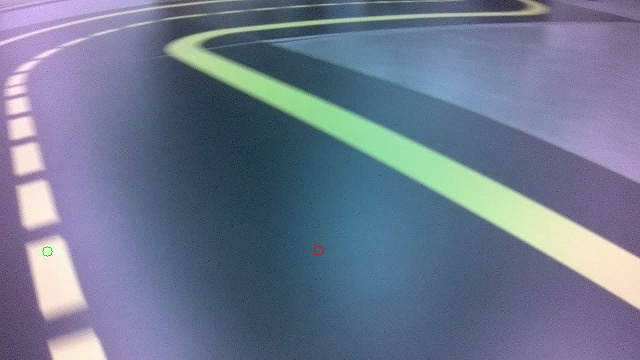

In [64]:
import cv2
import copy
import numpy as np
import PIL.Image

img_filename_fmt = 'dataset/images/frame_{:09d}.jpg'
ann_filename = 'dataset/annotation.txt'
with open(ann_filename, 'r') as f:
    data = [line.split() for line in f.readlines()]

filename, xpos, ypos = data[100]

xpos = int(float(xpos))
ypos = int(float(ypos))

image_ori = PIL.Image.open(filename)
width = image_ori.width
height = image_ori.height

with torch.no_grad():
    image = preprocess(image_ori)
    output = model(image).detach().cpu().numpy()
x, y = output[0]
print(x,y)
x = (x / 2 + 0.5) * width
y = (y / 2 + 0.5) * height
print(x, y)

image_np = copy.deepcopy(np.asarray(image_ori))
cv2.circle(image_np, (int(x), int(y)), radius=5, color=(255, 0, 0))  # Pred
cv2.circle(image_np, (xpos, ypos), radius=5, color=(0, 255, 0))     # GT

PIL.Image.fromarray(image_np)



In [39]:
A = 1
H = 1
Q = 1
R = 6

def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm for One Variable."""
    # (1) Prediction.
    x_pred = A * x_esti
    P_pred = A * P * A + Q

    # (2) Kalman Gain.
    K = P_pred * H / (H * P_pred * H + R)

    # (3) Estimation.
    x_esti = x_pred + K * (z_meas - H * x_pred)

    # (4) Error Covariance.
    P = P_pred - K * H * P_pred

    return x_esti, P

In [43]:
import cv2


filename = './test_video.mp4'
raw_video = cv2.VideoCapture(filename)
x_est = 0
P = 6
file_path = './result.mp4'
fps = 25.40
fourcc = cv2.VideoWriter_fourcc(*'DIVX')            # 인코딩 포맷 문자
width = 960
height = 540
size = (int(width), int (height))                   # 프레임 크기
out = cv2.VideoWriter(file_path, fourcc, fps, size)

while raw_video.isOpened():
    ret, frame = raw_video.read()
    if not ret :
        break
    with torch.no_grad():
        color_coverted = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_image = PIL.Image.fromarray(color_coverted)
        image = preprocess(pil_image)
        output = model(image).detach().cpu().numpy()
        
        
    x, y = output[0]
    x = (x / 2 + 0.5) * 960
    y = (y / 2 + 0.5) * 540

    x_est,P = kalman_filter(x,x_est,P)

    cv2.circle(frame, (int(x), int(y)), radius=5, color=(255, 0, 0))  # Pred
    
    cv2.imshow('image',frame)
    out.write(frame)
    
    if cv2.waitKey(30) == 27:
        break

out.release()     
raw_video.release()
cv2.destroyAllWindows()

OpenCV: FFMPEG: tag 0x58564944/'DIVX' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
